# Customer Analytics with Python & Jupyter

### Notebook for Data Researchers

This notebook demonstrates how **Python and Jupyter Notebooks** can be used end‑to‑end for:

- Data exploration and cleaning
- Feature engineering
- Machine learning modeling
- Business analytics and decision support

The goal is **clarity, reproducibility, and explainability**, making this suitable for teaching, workshops, or onboarding data scientists.


## 1. Environment Setup & Data Loading

We begin by importing commonly used Python libraries for:
- Data manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning (`scikit-learn`)

The dataset represents **50,000 customers** across multiple countries and captures demographics, engagement, purchases, and churn status.

In [1]:
# Import piplite and install libraries for learning environment
import piplite
await piplite.install('seaborn')

In [2]:

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, 
    roc_auc_score, 
    mean_squared_error
)
from sklearn.ensemble import (
    RandomForestClassifier, 
    RandomForestRegressor
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Display settings
pd.set_option('display.max_columns', 100)

# Load data
df = pd.read_csv("ecommerce_customer_churn_dataset.csv")
df.head()


Matplotlib is building the font cache; this may take a moment.


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,34.0,46.40,2.0,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,71.0,57.96,9.2,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,11.0,12.24,11.5,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,47.0,44.10,5.4,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,141.30,73.0,25.20,5.5,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


## 2. Understanding the Dataset

Before modeling, it is critical to **understand data structure and quality**.

We inspect:
- Number of rows and columns
- Data types (numerical vs categorical)
- Missing values
- Summary statistics

This step helps guide cleaning and feature engineering decisions.

In [3]:

# Dataset shape
print("Shape:", df.shape)

# Data types and missing values
df.info()

# Summary statistics
df.describe(include='all').T


Shape: (50000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,47505.0,NaN,NaN,NaN,37.802968,11.834668,5.0,29.0,38.0,46.0,200.0
Gender,50000,3,Female,25116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,50000,8,USA,17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,50000,40,Houston,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Membership_Years,50000.0,NaN,NaN,NaN,2.984009,2.059105,0.1,1.4,2.5,4.0,10.0
Login_Frequency,50000.0,NaN,NaN,NaN,11.62466,7.810657,0.0,6.0,11.0,17.0,46.0
Session_Duration_Avg,46601.0,NaN,NaN,NaN,27.660754,10.871013,1.0,19.7,26.8,34.7,75.6
Pages_Per_Session,47000.0,NaN,NaN,NaN,8.737811,3.77822,1.0,6.0,8.4,11.2,24.1
Cart_Abandonment_Rate,50000.0,NaN,NaN,NaN,57.079973,16.282723,0.0,46.4,58.1,68.7,143.74335
Wishlist_Items,46000.0,NaN,NaN,NaN,4.298391,3.189754,0.0,2.0,4.0,6.0,28.0


## 3. Data Quality Assessment

### Common issues in real-world customer data
- Missing values (NaN)
- Mixed data types
- Outliers in financial and engagement metrics
- Inconsistent categorical values

We explicitly quantify missingness to decide appropriate treatment strategies.

In [4]:

# Missing value percentage per column
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct


Social_Media_Engagement_Score    12.000
Credit_Balance                   11.000
Mobile_App_Usage                 10.000
Returns_Rate                      8.982
Wishlist_Items                    8.000
Discount_Usage_Rate               7.000
Product_Reviews_Written           7.000
Session_Duration_Avg              6.798
Days_Since_Last_Purchase          6.000
Pages_Per_Session                 6.000
Email_Open_Rate                   5.056
Payment_Method_Diversity          5.000
Age                               4.990
Customer_Service_Calls            0.336
Gender                            0.000
Average_Order_Value               0.000
Total_Purchases                   0.000
Cart_Abandonment_Rate             0.000
Login_Frequency                   0.000
Membership_Years                  0.000
City                              0.000
Lifetime_Value                    0.000
Country                           0.000
Churned                           0.000
Signup_Quarter                    0.000


## 4. Data Cleaning & Preparation

### Strategies Used
- **Numerical features**: Median imputation (robust to outliers)
- **Categorical features**: Mode imputation
- **Binary target (Churned)**: Rows without labels are removed
- **Outliers**: Left intact for tree-based models

These steps ensure the dataset is suitable for both **ML models** and **business analysis**.

In [5]:

# Separate feature types
categorical_cols = ['Gender', 'Country', 'City', 'Signup_Quarter']
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target from numerical list
numerical_cols = [col for col in numerical_cols if col != 'Churned']

# Drop rows with missing target
df = df.dropna(subset=['Churned'])

# Impute numerical columns with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum().sum()
df.describe()


,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,2.33618,1440.626292,1958.507600,0.289000
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,1.08465,907.249443,1155.938248,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,1164.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.00000,1243.415000,1896.000000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,2664.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,7197.000000,1.000000


## 5. Exploratory Data Analysis (EDA)

EDA helps researchers **connect data patterns to business meaning**.

Examples:
- Engagement vs churn
- Spending behavior across countries
- Distribution of customer lifetime value

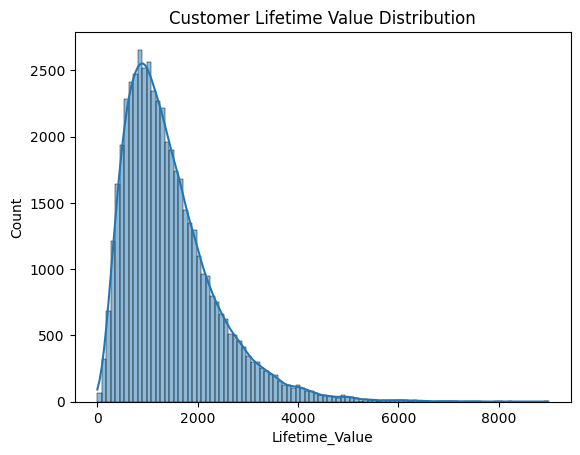

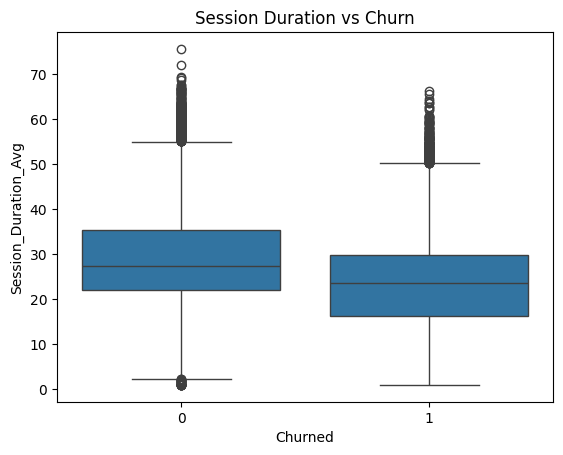

In [6]:

# Distribution of Lifetime Value
plt.figure()
sns.histplot(df['Lifetime_Value'], bins=100, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.show()

# Engagement vs churn
plt.figure()
sns.boxplot(x='Churned', y='Session_Duration_Avg', data=df)
plt.title("Session Duration vs Churn")
plt.show()


## 6. Feature Engineering & Preprocessing Pipeline

We use **scikit-learn Pipelines** to:
- Standardize numerical features
- One-hot encode categorical features
- Prevent data leakage

This is considered a **best practice** in modern ML workflows.

In [7]:

X = df.drop('Churned', axis=1)
y = df['Churned']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),       
    ]
)

## 7. Churn Prediction (Binary Classification)

### Business Question
**Which customers are likely to churn?**

We train a Random Forest classifier and evaluate it using:
- Precision & Recall
- F1-score
- ROC-AUC


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)
y_prob = clf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7110
           1       0.92      0.75      0.83      2890

    accuracy                           0.91     10000
   macro avg       0.92      0.86      0.89     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC: 0.9246554879087399


## 8. Customer Segmentation (Clustering)

### Objective
Identify **behaviorally similar customer groups** to support:
- Personalization
- Targeted marketing
- Retention strategies

In [9]:
segmentation_features = [
    'Login_Frequency',
    'Session_Duration_Avg',
    'Total_Purchases',
    'Average_Order_Value',
    'Lifetime_Value'
]

seg_data = df[segmentation_features]
scaled_data = StandardScaler().fit_transform(seg_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

seg_data['Cluster'] = clusters

print("Silhouette Score:", silhouette_score(scaled_data, clusters))
seg_data.groupby('Cluster').mean()


<ipython-input-9-6427cca67ca3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_data['Cluster'] = clusters


Silhouette Score: 0.2800162777700374


,Login_Frequency,Session_Duration_Avg,Total_Purchases,Average_Order_Value,Lifetime_Value
Cluster,,,,,
0,23.400550,44.016341,23.439587,122.245213,2505.269839
1,5.247868,19.196574,7.840565,114.680054,825.199681
2,11.960768,29.424739,16.731043,203.788253,2676.425837
3,14.203444,30.120217,13.798478,105.386532,1295.250826


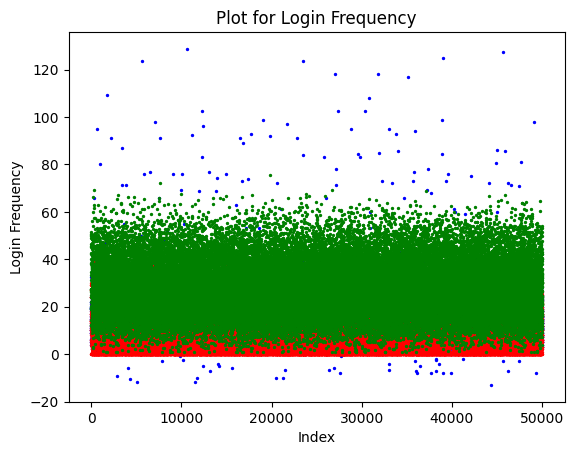

In [10]:
plt.figure()
plt.scatter(df.index, df["Total_Purchases"], s=2, color="blue") # draw the scatter plot for total purchase 
plt.scatter(df.index, df["Login_Frequency"], s=2, color="red")
plt.scatter(df.index, df["Session_Duration_Avg"], s=2, color="green")

plt.xlabel("Index")
plt.ylabel("Login Frequency")
plt.title("Plot for Login Frequency")
plt.show()

## 9. Lifetime Value Forecasting (Regression)

Predicting LTV helps businesses:
- Prioritize high-value customers
- Optimize acquisition spend
- Design loyalty programs

In [11]:

y_ltv = df['Lifetime_Value']
X_ltv = df.drop(['Lifetime_Value', 'Churned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_ltv, y_ltv, test_size=0.2, random_state=42
)

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

reg_pipeline.fit(X_train, y_train)
y_pred = reg_pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


<class 'ValueError'>: A given column is not a column of the dataframe

## 10. Business Analytics & Decision Support

We translate model outputs into **actionable insights**:
- Churn risk scoring
- Retention prioritization
- Marketing optimization


In [12]:

# Attach churn risk scores
df.loc[X_test.index, 'Churn_Risk_Score'] = y_prob

# High-risk, high-value customers
high_risk = df[
    (df['Churn_Risk_Score'] > 0.7) & 
    (df['Lifetime_Value'] > df['Lifetime_Value'].median())
]

high_risk[['Country', 'Lifetime_Value']].groupby('Country').count()


,Lifetime_Value
Country,
Australia,66
Canada,82
France,67
Germany,65
India,55
Japan,29
UK,101
USA,271


## 11. Key Teaching Takeaways

- Jupyter enables **narrative + code + results** in one place
- Pipelines improve reproducibility and prevent leakage
- ML outputs must connect to business decisions
- Python scales from exploration to production

**This notebook can serve as a foundation for advanced topics such as explainable AI, causal analysis, and MLOps.**